In [2]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed
    os.environ['PYTHONHASHSEED']=str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [4]:
plt.rc("figure", autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10,)
plt.rc("image", cmap='magma')
warnings.filterwarnings("ignore")

In [6]:
ds_train=image_dataset_from_directory(
    'C:/Users/tanis/OneDrive/Desktop/practise/cv1/dataset/car-or-truck/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,)

ds_valid= image_dataset_from_directory(
    "C:/Users/tanis/OneDrive/Desktop/practise/cv1/dataset/car-or-truck/valid",
    labels='inferred',
    label_mode = 'binary',
    image_size=[128,128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [8]:
! pip install tensorflow_hub
import tensorflow_hub as hub

pretrained_base = tf.keras.models.load_model(
    "C:/Users/tanis/OneDrive/Desktop/practise/cv1/dataset/cv-course-model/cv-course-models/inceptionv1"
)

     ------------------------------------ 100.6/100.6 kB 640.6 kB/s eta 0:00:00


In [9]:
pretrained_base.trainable=False

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [13]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["binary_accuracy"],
)

In [15]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
)

Epoch 1/30
80/80 [==============================] - 63s 782ms/step - loss: 0.6179 - binary_accuracy: 0.6576 - val_loss: 0.6388 - val_binary_accuracy: 0.6430
Epoch 2/30
80/80 [==============================] - 58s 730ms/step - loss: 0.6157 - binary_accuracy: 0.6555 - val_loss: 0.6245 - val_binary_accuracy: 0.6571
Epoch 3/30
80/80 [==============================] - 65s 810ms/step - loss: 0.6127 - binary_accuracy: 0.6605 - val_loss: 0.6174 - val_binary_accuracy: 0.6581
Epoch 4/30
80/80 [==============================] - 63s 785ms/step - loss: 0.6104 - binary_accuracy: 0.6596 - val_loss: 0.6164 - val_binary_accuracy: 0.6589
Epoch 5/30
80/80 [==============================] - 67s 845ms/step - loss: 0.6071 - binary_accuracy: 0.6689 - val_loss: 0.6367 - val_binary_accuracy: 0.6092
Epoch 6/30
80/80 [==============================] - 60s 751ms/step - loss: 0.6082 - binary_accuracy: 0.6619 - val_loss: 0.6180 - val_binary_accuracy: 0.6537
Epoch 7/30
80/80 [==============================] - 63s 79

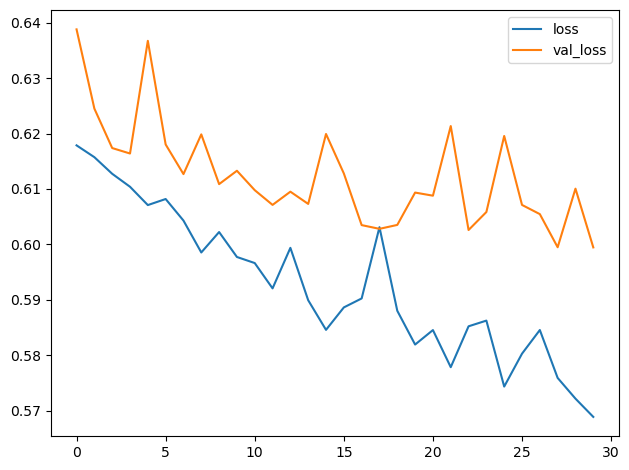

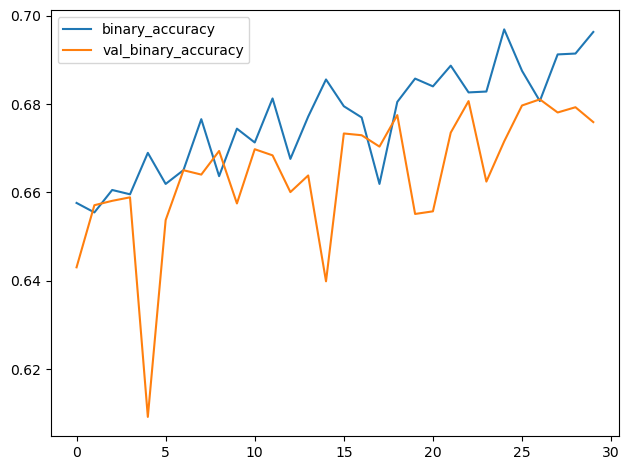

In [16]:
import pandas as pd
history_frame=pd.DataFrame(history.history)
history_frame.loc[:, ["loss", "val_loss"]].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();